PROJECT

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [31]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
fraud=data[data.Class == 1]
normal=data[data.Class== 0]

In [7]:

print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [8]:
#statistical measures of data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
#compare both the transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [4]:

# Check the distribution of fraud and non-fraud transactions
fraud_distribution = data['Class'].value_counts() # gets the class value_count in numerical format
fraud_percentage = data['Class'].value_counts(normalize=True) * 100 # gets the class value_count in percentile format
fraud_summary = pd.DataFrame({'Count': fraud_distribution, 'Percentage': fraud_percentage}) # Create a DataFrame to display both the numeric and percentage
print(fraud_summary)

        Count  Percentage
Class                    
0      284315   99.827251
1         492    0.172749


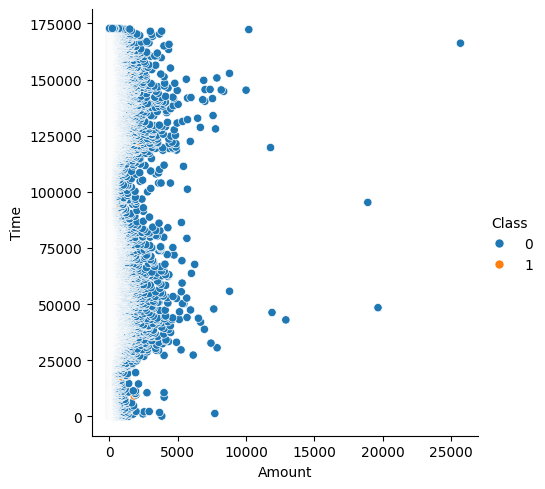

In [6]:
sns.relplot(x='Amount',y='Time',hue='Class',data=data)

Since we can see from above graph there are only 492 fraud cases, the number of yellow dots representing fraudulent transactions is significantly lower compared to the blue dots, which indicate normal transactions.

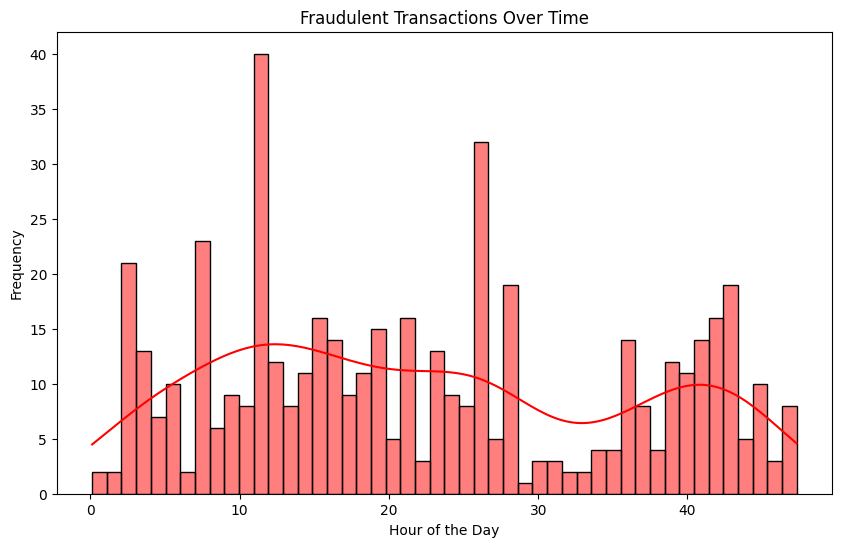

In [12]:

data['Hour'] = data['Time'] / 3600  # Convert seconds to hours

# Plot fraud transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 1]['Hour'], bins=48, kde=True, color='red')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

Above chart shows the relative timing of fraudulent transactions within this dataset. While we see peaks in activity around the 12th and 18th units of time, it's important to note that these "hours" don't necessarily correspond to a specific time of day. The data represents relative time within the dataset, and further investigation is needed to understand the true context of these peaks.

In [13]:
x=data.iloc[:,:-1]
y=data['Class']

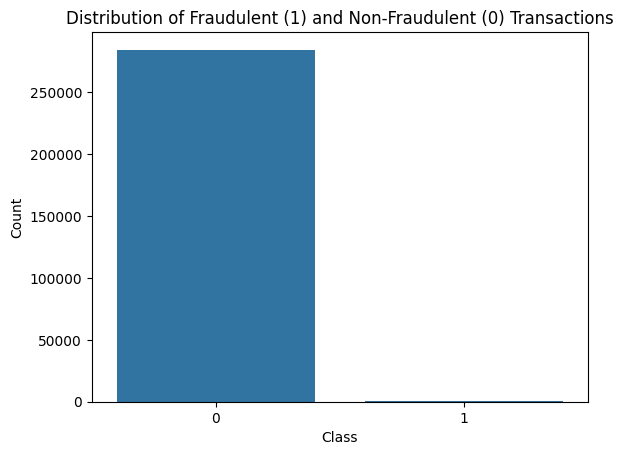

In [14]:
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent (1) and Non-Fraudulent (0) Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

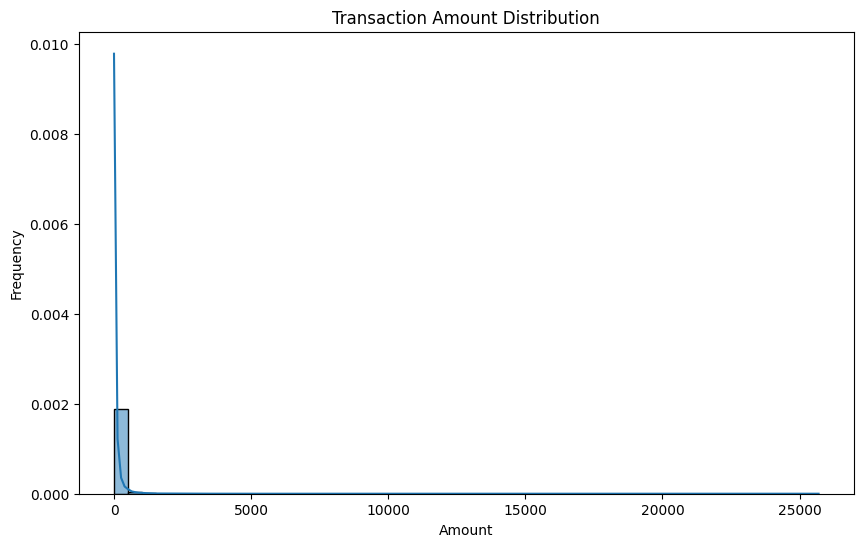

In [6]:

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True,stat='density')  # Histogram of the 'Amount' column
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

#plt.ylim(0, 0.0002) # will help to zoom the y axis
plt.show()

Understanding Transaction Amount Distribution
This histogram shows how transaction amounts are distributed in the dataset:

Most transactions have very small amounts, forming a tall spike near zero.
A few transactions have larger amounts, but they are much less common.
The distribution is right-skewed, meaning there are many small transactions and fewer large ones.
Why is this important?

Fraud may be more likely in specific amount ranges.
The model can learn patterns based on transaction amounts.
Feature scaling may be needed to handle the wide range of amounts.


In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Data Scaling & Standardization (Scaling step)¶
Data Scaling & Standardization
Many machine learning models perform better when all numerical features are on the same scale.

Why is Scaling Important?
Some columns have large values (e.g., "Amount"), while others are small.
Without scaling, models may incorrectly give more importance to larger values.
Standardization removes bias by ensuring all features have:
Mean = 0
Standard Deviation = 1
What Did We Do?
Used StandardScaler to transform all features.
Split the dataset into:
Training Set (64%)
Validation Set (16%)
Testing Set (20%)
Now, our dataset is scaled, standardized, and ready for fraud detection modeling.

In [33]:
# Features and target variable
X = new_dataset.drop('Class', axis=1)
y = new_dataset['Class']
 #Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on training data and transform
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train 
)

#convert target variable to NumPy array
y_test=y_test.values
y_train=y_train.values
print(f"Training Data: {X_train.shape}, Validation Data: {X_val.shape}, Testing Data: {X_test.shape}")







Training Data: (629, 30), Validation Data: (158, 30), Testing Data: (197, 30)


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import accuracy_score
X_train_prediction = (X_train_prediction > 0.5).astype(int)  # For binary classification

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the KNN model on the training data
knn.fit(X_train_scaled, y_train)
y_pred=knn.predict(X_test_scaled)
print(y_pred)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[0 0 0 ... 0 0 0]
Accuracy: 0.9994148145547324
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



MSE is: 6.995023723131657e-05
weights [-4.40141151e-09 -1.92821318e-03  2.86749812e-03 -5.09384109e-03
  3.77446432e-03 -2.33154935e-03 -1.65913577e-03 -6.84365332e-03
  8.37548451e-04 -3.62473231e-03 -8.10063340e-03  6.25054237e-03
 -1.07879008e-02 -2.14027883e-04 -1.31916500e-02 -2.27502362e-04
 -9.30369116e-03 -1.59964150e-02 -5.57671738e-03  1.90506040e-03
  2.82527154e-04  2.04027309e-03  2.46910398e-04  1.59673296e-04
 -5.15506883e-04  3.32485797e-04  3.77414089e-04  1.67672138e-03
  1.13634872e-03  7.12930471e-06]
intercept 0.001514746036580926


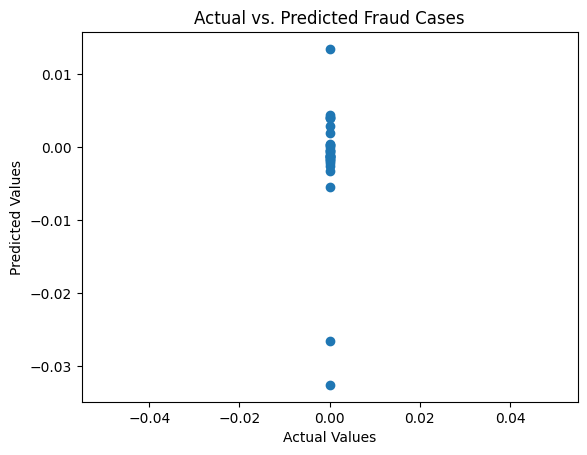

In [13]:
#NOO
from sklearn import linear_model
from sklearn.metrics import mean_squared_error



# Splitting manually (last 30 rows for testing)
class_x_train = X[:-30]  # Training features
class_x_test = X[-30:]  # Testing features
class_y_train = y[:-30]  # Training target
class_y_test = y[-30:]  # Testing target

# Initialize Linear Regression model
model = linear_model.LinearRegression()

# Train the model
model.fit(class_x_train, class_y_train)

# Predict on test data
class_y_predicted = model.predict(class_x_test)

# Calculate Mean Squared Error
print("MSE is:", mean_squared_error(class_y_test, class_y_predicted))
print("weights",model.coef_)
print("intercept",model.intercept_)
plt.scatter(class_y_test, class_y_predicted)  # Actual vs. Predicted values
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Fraud Cases")
plt.show()




In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
diabates_x=np.array([[1], [2], [3]])
diabates_x_train=diabates_x
diabates_x_test=diabates_x
diabates_y_train=np.array([3,2,4])
diabates_y_test=np.array([3,2,4])
# Initialize Linear Regression model
model = linear_model.LinearRegression()

# Train the model
model.fit(diabates_x_train, diabates_y_train)

# Predict on test data
diabates_y_predicted = model.predict(diabates_x_test)

# Calculate Mean Squared Error
print("MSE is:", mean_squared_error(diabates_y_test, diabates_y_predicted))
print("weights",model.coef_)
print("intercept",model.intercept_)


MSE is: 0.5000000000000001
weights [0.5]
intercept 2.0
